In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2_1/tfidf_embeddings_2_1.csv")
data

,Unnamed: 0.1,Unnamed: 0,00,000,007alisohrab,022,04,04x65291ev,06,07,...,ड़न,ड़फ,फ़टक,फ़र,१९४६,२०,२१व,५००,७त,Labels
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
2,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
3,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,4041,4041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
1616,4042,4042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
1617,4043,4043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
1618,4045,4045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake


In [ ]:
X=data.drop(["Labels","Unnamed: 0","Unnamed: 0.1"], axis=1)
y=data["Labels"]

In [ ]:
for i in range(1620):
  if y[i] == 'fake':
    y[i] = int(1)
  else:
    y[i] = int(0)

<ipython-input-7-e3fb3919ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(0)
<ipython-input-7-e3fb3919ab3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(1)


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1615    0
1616    1
1617    0
1618    1
1619    1
Name: Labels, Length: 1620, dtype: object

In [ ]:
y = y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)

In [ ]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of SVM:  0.708411214953271
Precision of SVM:  0.7190545028839767
Recall of SVM:  0.708411214953271
F1-score of SVM:  0.7084580771455126
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       244
           1       0.78      0.65      0.71       291

    accuracy                           0.71       535
   macro avg       0.71      0.71      0.71       535
weighted avg       0.72      0.71      0.71       535



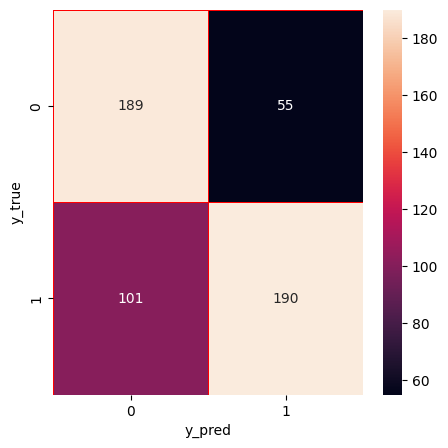

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
tw1a.append(svm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.9649769585253456
Precision of SVM:  0.9655567185707505
Recall of SVM:  0.9649769585253456
F1-score of SVM:  0.9649369402470834
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       566
           1       0.98      0.94      0.96       519

    accuracy                           0.96      1085
   macro avg       0.97      0.96      0.96      1085
weighted avg       0.97      0.96      0.96      1085



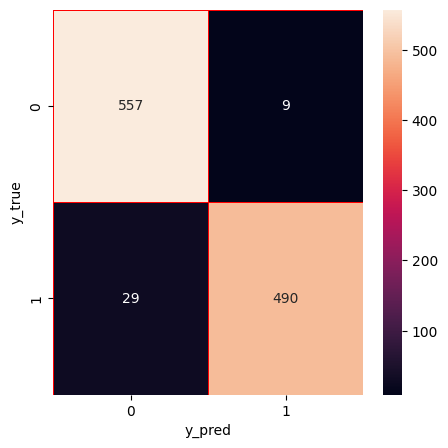

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

ttw1a.append(svm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the objective function
def objective(params):
    params = {
        'C': params['C'],
        'kernel': params['kernel'],  # Specify kernel from hyperparameter search space
    }

    clf = SVC(**params)

    # Use cross-validation for better evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy
    score = scores.mean()

    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -3, 3),  # Search in log scale for C (SVM regularization parameter)
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    # You can add more hyperparameters here as needed
}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("SVM: Hyperopt estimated optimum {}".format(best))


100%|██████████| 20/20 [03:27<00:00, 10.39s/trial, best loss: -0.7096774193548387]
SVM: Hyperopt estimated optimum {'C': 0.6906724776768669, 'kernel': 3}


Accuracy of SVM:  0.7046728971962617
Precision of SVM:  0.714535905423756
Recall of SVM:  0.7046728971962617
F1-score of SVM:  0.7048090991471313
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       244
           1       0.77      0.65      0.71       291

    accuracy                           0.70       535
   macro avg       0.71      0.71      0.70       535
weighted avg       0.71      0.70      0.70       535



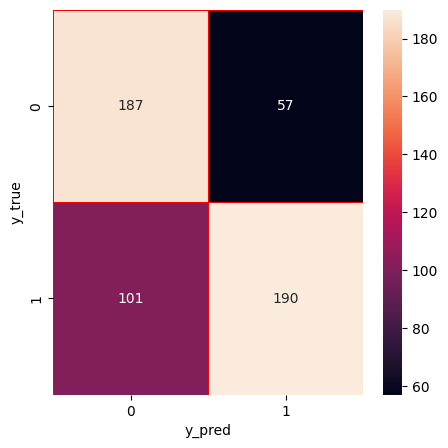

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='sigmoid', C= 0.6906724776768669)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
th1a.append(svm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.8534562211981567
Precision of SVM:  0.856031776034913
Recall of SVM:  0.8534562211981567
F1-score of SVM:  0.8528289407651638
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       566
           1       0.88      0.80      0.84       519

    accuracy                           0.85      1085
   macro avg       0.86      0.85      0.85      1085
weighted avg       0.86      0.85      0.85      1085



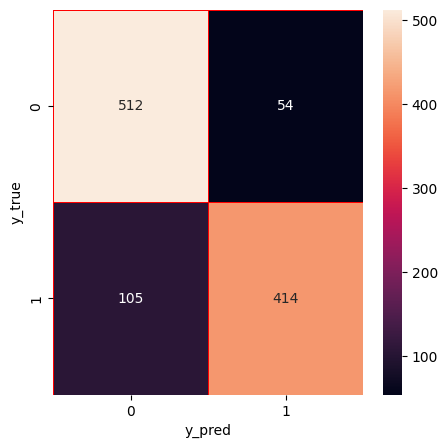

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

tth1a.append(svm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




Accuracy of XGBoost: 0.6
Precision of XGBoost: 0.6070305272895468
Recall of XGBoost: 0.6
F1-score of XGBoost: 0.6004780809662269
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       244
           1       0.65      0.57      0.61       291

    accuracy                           0.60       535
   macro avg       0.60      0.60      0.60       535
weighted avg       0.61      0.60      0.60       535



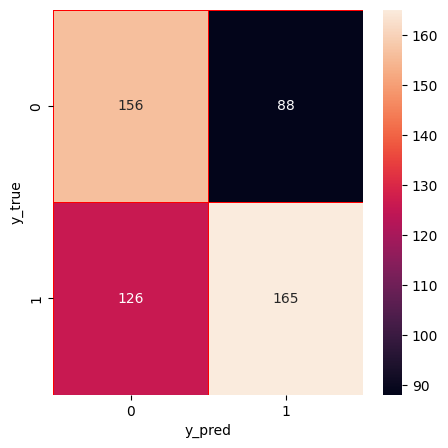

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.8009216589861751
Precision of XGBoost: 0.8032887991450941
Recall of XGBoost: 0.8009216589861751
F1-score of XGBoost: 0.7999373729220651
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       566
           1       0.83      0.74      0.78       519

    accuracy                           0.80      1085
   macro avg       0.80      0.80      0.80      1085
weighted avg       0.80      0.80      0.80      1085



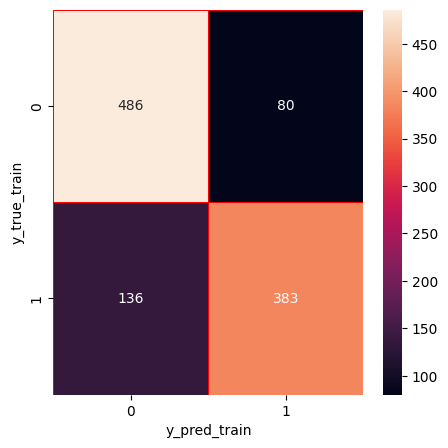

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:14<00:00,  3.74s/trial, best loss: -0.6560747663551402]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.3679609448188547, 'max_depth': 6.0, 'n_estimators': 50.0}


Accuracy of XGBoost: 0.6448598130841121
Precision of XGBoost: 0.6488250755045522
Recall of XGBoost: 0.6448598130841121
F1-score of XGBoost: 0.645545987840418
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       244
           1       0.69      0.63      0.66       291

    accuracy                           0.64       535
   macro avg       0.64      0.65      0.64       535
weighted avg       0.65      0.64      0.65       535



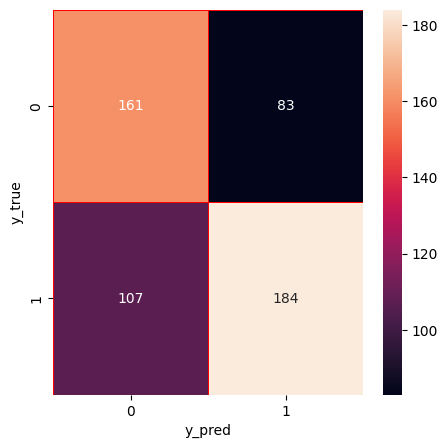

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.3679609448188547, n_estimators = 50, max_depth = 6)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9235023041474655
Precision of XGBoost: 0.9242549793763672
Recall of XGBoost: 0.9235023041474655
F1-score of XGBoost: 0.9233848203286106
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       566
           1       0.94      0.90      0.92       519

    accuracy                           0.92      1085
   macro avg       0.92      0.92      0.92      1085
weighted avg       0.92      0.92      0.92      1085



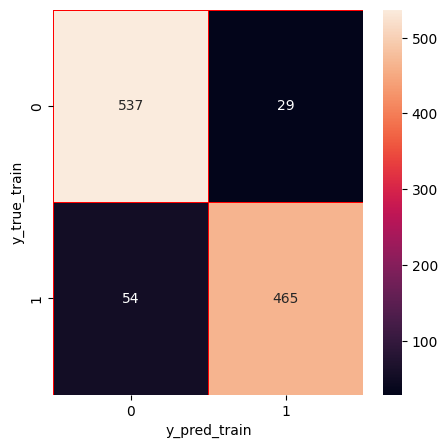

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.6485981308411215
Precision of RF: 0.6554590434304562
Recall of RF: 0.6485981308411215
F1-score of RF: 0.6490845104100437
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       244
           1       0.70      0.62      0.66       291

    accuracy                           0.65       535
   macro avg       0.65      0.65      0.65       535
weighted avg       0.66      0.65      0.65       535



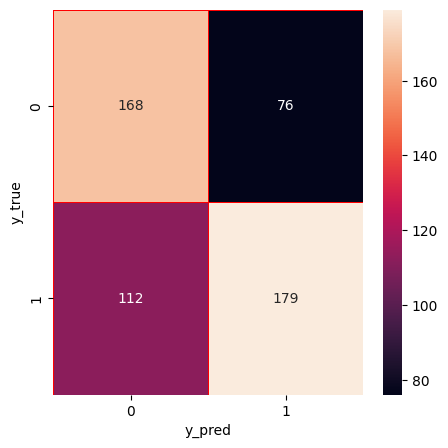

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9788018433179724
Precision of RF: 0.9788341412956918
Recall of RF: 0.9788018433179724
F1-score of RF: 0.978797150749055
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



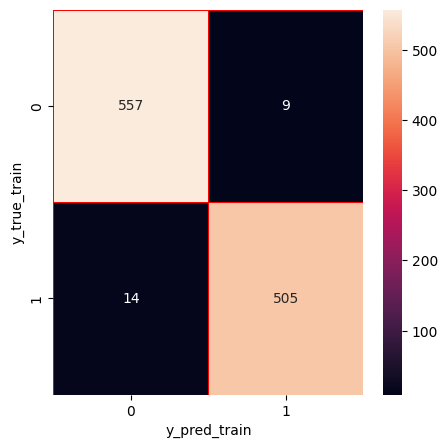

In [ ]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:03<00:00,  6.38trial/s, best loss: -0.5196261682242991]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 47.0, 'max_features': 15.0, 'min_samples_leaf': 2.0, 'min_samples_split': 5.0, 'n_estimators': 70.0}


Accuracy of RF: 0.48411214953271026
Precision of RF: 0.6262489825605465
Recall of RF: 0.48411214953271026
F1-score of RF: 0.36302897196261685
              precision    recall  f1-score   support

           0       0.47      0.97      0.63       244
           1       0.76      0.08      0.14       291

    accuracy                           0.48       535
   macro avg       0.61      0.52      0.38       535
weighted avg       0.63      0.48      0.36       535



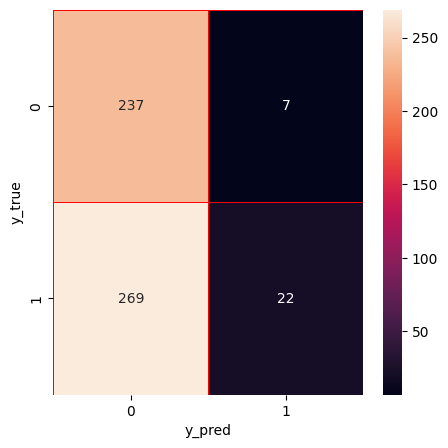

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 70, min_samples_leaf = 2, max_depth = 47, min_samples_split = 5, max_features = 15, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.6497695852534562
Precision of RF: 0.7871702692686721
Recall of RF: 0.6497695852534562
F1-score of RF: 0.5933131171328138
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       566
           1       0.99      0.27      0.42       519

    accuracy                           0.65      1085
   macro avg       0.80      0.63      0.59      1085
weighted avg       0.79      0.65      0.59      1085



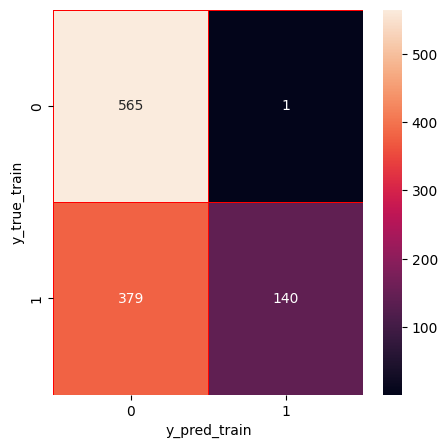

In [ ]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.6149532710280374
Precision of DT: 0.6149532710280374
Recall of DT: 0.6149532710280374
F1-score of DT: 0.6149532710280374
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       244
           1       0.65      0.65      0.65       291

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted avg       0.61      0.61      0.61       535



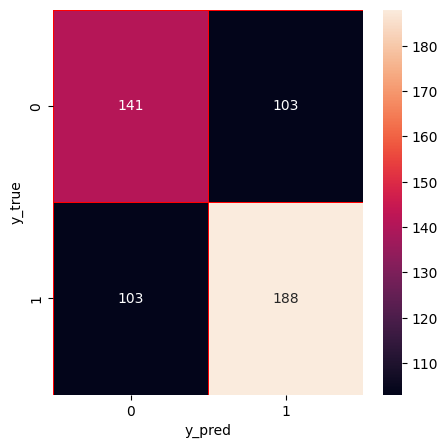

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9788018433179724
Precision of DT: 0.9794883724757641
Recall of DT: 0.9788018433179724
F1-score of DT: 0.9787760280852189
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



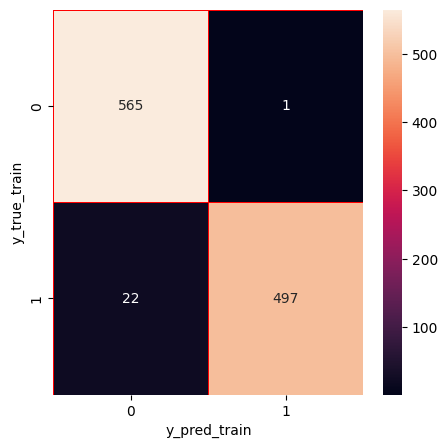

In [ ]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:03<00:00, 13.77trial/s, best loss: -0.5420560747663551]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 40.0, 'max_features': 12.0, 'min_samples_leaf': 1.0, 'min_samples_split': 7.0}


Accuracy of DT: 0.48598130841121495
Precision of DT: 0.5658847200903276
Recall of DT: 0.48598130841121495
F1-score of DT: 0.39344253107091315
              precision    recall  f1-score   support

           0       0.47      0.92      0.62       244
           1       0.65      0.12      0.20       291

    accuracy                           0.49       535
   macro avg       0.56      0.52      0.41       535
weighted avg       0.57      0.49      0.39       535



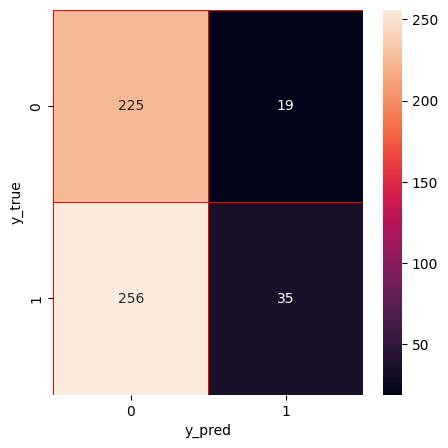

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 40, min_samples_split = 7, max_features = 12, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.6230414746543779
Precision of DT: 0.7581691427730461
Recall of DT: 0.6230414746543779
F1-score of DT: 0.5552458710452953
              precision    recall  f1-score   support

           0       0.58      0.99      0.73       566
           1       0.95      0.22      0.36       519

    accuracy                           0.62      1085
   macro avg       0.77      0.61      0.55      1085
weighted avg       0.76      0.62      0.56      1085



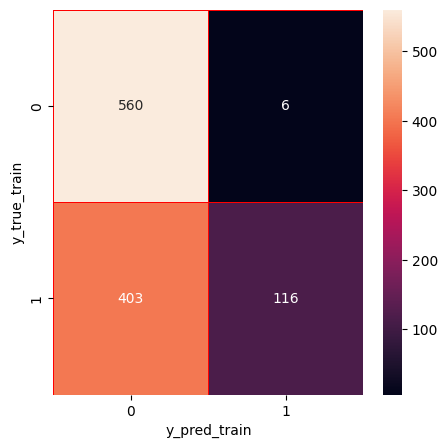

In [ ]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.6728971962616822
Precision of ET: 0.6807883617103919
Recall of ET: 0.6728971962616822
F1-score of ET: 0.6732538349188241
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       244
           1       0.73      0.63      0.68       291

    accuracy                           0.67       535
   macro avg       0.68      0.68      0.67       535
weighted avg       0.68      0.67      0.67       535



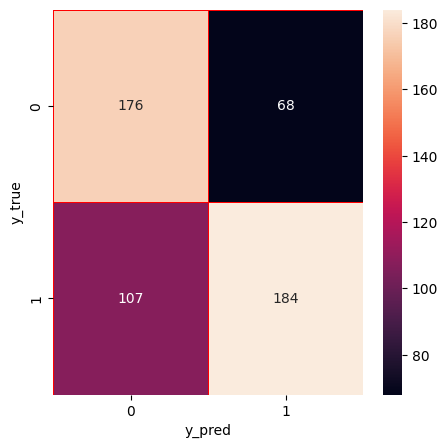

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9788018433179724
Precision of ET: 0.9794883724757641
Recall of ET: 0.9788018433179724
F1-score of ET: 0.9787760280852189
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



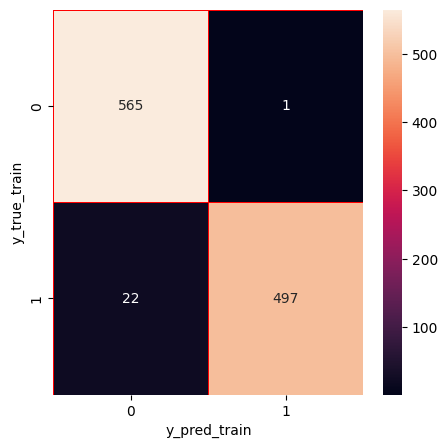

In [ ]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:03<00:00,  6.46trial/s, best loss: -0.45794392523364486]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 13.0, 'max_features': 13.0, 'min_samples_leaf': 2.0, 'min_samples_split': 7.0, 'n_estimators': 130.0}


Accuracy of ET: 0.45607476635514016
Precision of ET: 0.4798916378811523
Recall of ET: 0.45607476635514016
F1-score of ET: 0.2889796425058458
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       244
           1       0.50      0.00      0.01       291

    accuracy                           0.46       535
   macro avg       0.48      0.50      0.32       535
weighted avg       0.48      0.46      0.29       535



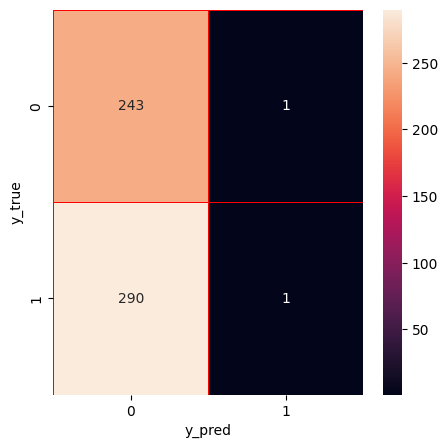

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 130, min_samples_leaf = 2, max_depth = 13, min_samples_split = 7, max_features = 13, criterion = 'gini')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.5345622119815668
Precision of ET: 0.7540263417194835
Recall of ET: 0.5345622119815668
F1-score of ET: 0.3858604182275845
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       566
           1       1.00      0.03      0.05       519

    accuracy                           0.53      1085
   macro avg       0.76      0.51      0.37      1085
weighted avg       0.75      0.53      0.39      1085



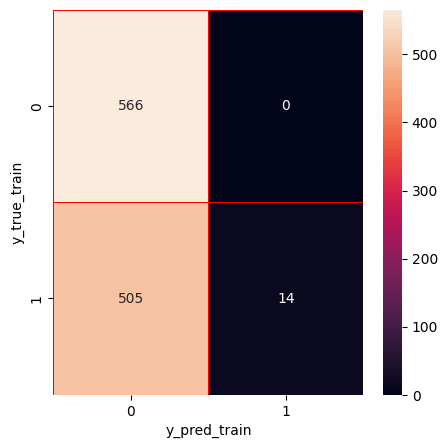

In [ ]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3377
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 175
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
Accuracy of LightGBM: 0.6130841121495327
Precision of LightGBM: 0.6134818759695788
Recall of LightGBM: 0.6130841121495327
F1-score of LightGBM: 0.6132637634803835
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       244
           1       0.65      0.64      0.64       291

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted

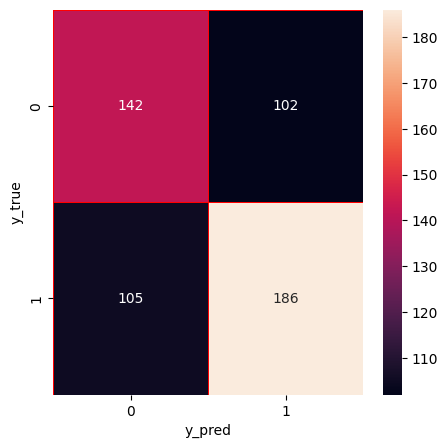

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 0.9529953917050691
Precision of LightGBM: 0.9530446953840649
Recall of LightGBM: 0.9529953917050691
F1-score of LightGBM: 0.9529802613246194
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.96      0.94      0.95       519

    accuracy                           0.95      1085
   macro avg       0.95      0.95      0.95      1085
weighted avg       0.95      0.95      0.95      1085



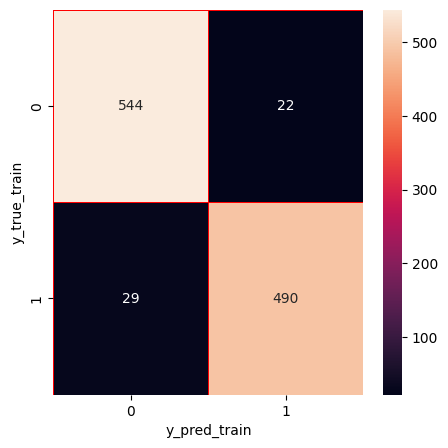

In [ ]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3079
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4327
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 352
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

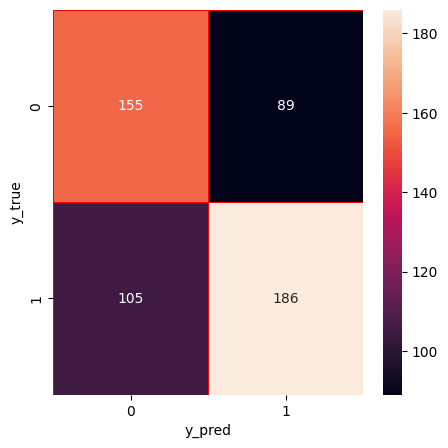

In [ ]:
best_params = {
    'n_estimators': 261,
    'max_depth': 13,
    'num_leaves': 59,
    'min_child_samples': 8,
    'learning_rate': 0.051743134063236496,
    'subsample': 0.5519217298077727,
    'colsample_bytree': 0.5749298215402592
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 0.967741935483871
Precision of LightGBM (Hyperopt): 0.9678019707397398
Recall of LightGBM (Hyperopt): 0.967741935483871
F1-score of LightGBM (Hyperopt): 0.9677315518894448
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.97      0.96      0.97       519

    accuracy                           0.97      1085
   macro avg       0.97      0.97      0.97      1085
weighted avg       0.97      0.97      0.97      1085



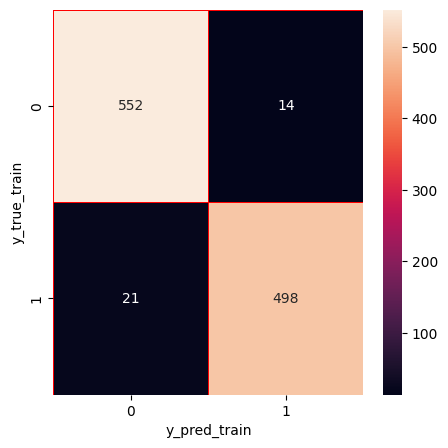

In [ ]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.6074766355140186
Precision of AdaBoost: 0.6183649140087571
Recall of AdaBoost: 0.6074766355140186
F1-score of AdaBoost: 0.607120045455436
              precision    recall  f1-score   support

           0       0.56      0.68      0.61       244
           1       0.67      0.55      0.60       291

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted avg       0.62      0.61      0.61       535



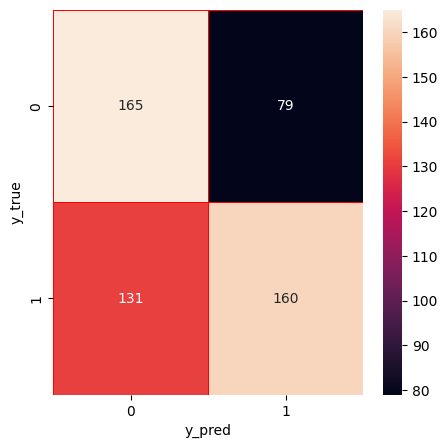

In [ ]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.7640552995391705
Precision of AdaBoost: 0.7662058179278446
Recall of AdaBoost: 0.7640552995391705
F1-score of AdaBoost: 0.7627559375888829
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       566
           1       0.79      0.70      0.74       519

    accuracy                           0.76      1085
   macro avg       0.77      0.76      0.76      1085
weighted avg       0.77      0.76      0.76      1085



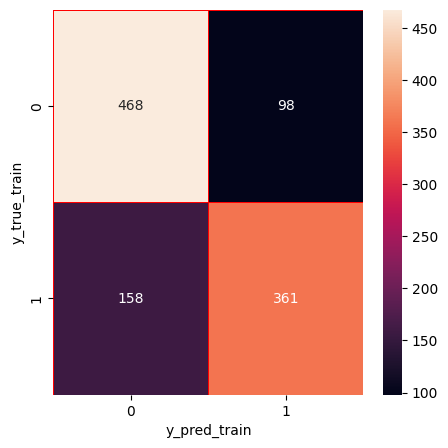

In [ ]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:50<00:00,  5.53s/trial, best loss: -0.6467289719626168]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.038228382897411546, 'n_estimators': 151.0}


Accuracy of AdaBoost (Hyperopt): 0.6467289719626168
Precision of AdaBoost (Hyperopt): 0.6463052932949929
Recall of AdaBoost (Hyperopt): 0.6467289719626168
F1-score of AdaBoost (Hyperopt): 0.6399506700399158
              precision    recall  f1-score   support

           0       0.64      0.50      0.57       244
           1       0.65      0.77      0.70       291

    accuracy                           0.65       535
   macro avg       0.65      0.64      0.63       535
weighted avg       0.65      0.65      0.64       535



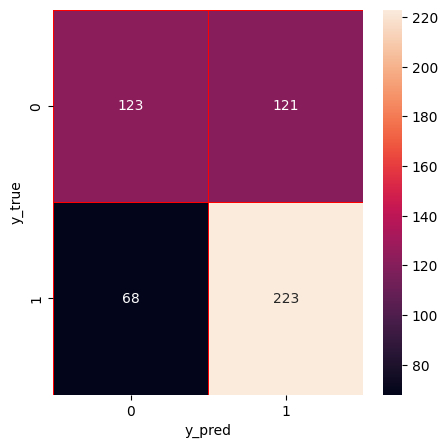

In [ ]:
best_params = {
    'n_estimators': 151,
    'learning_rate': 0.038228382897411546,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 0.7078341013824885
Precision of AdaBoost (Hyperopt): 0.7190456162044166
Recall of AdaBoost (Hyperopt): 0.7078341013824885
F1-score of AdaBoost (Hyperopt): 0.7061513937684594
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       566
           1       0.66      0.80      0.72       519

    accuracy                           0.71      1085
   macro avg       0.72      0.71      0.71      1085
weighted avg       0.72      0.71      0.71      1085



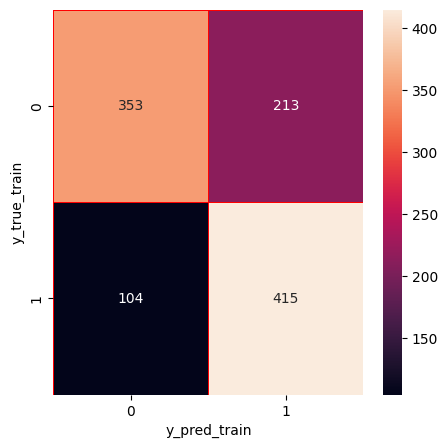

In [ ]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]

In [ ]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [ ]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
svm,0.964977,0.965557,0.964977,0.964937,0.708411,0.719055,0.708411,0.708458,0.853456,0.856032,0.853456,0.852829,0.704673,0.714536,0.704673,0.704809
xgb,0.800922,0.803289,0.800922,0.799937,0.600000,0.607031,0.600000,0.600478,0.923502,0.924255,0.923502,0.923385,0.644860,0.648825,0.644860,0.645546
rf,0.978802,0.978834,0.978802,0.978797,0.648598,0.655459,0.648598,0.649085,0.649770,0.787170,0.649770,0.593313,0.484112,0.626249,0.484112,0.363029
dt,0.978802,0.979488,0.978802,0.978776,0.614953,0.614953,0.614953,0.614953,0.623041,0.758169,0.623041,0.555246,0.485981,0.565885,0.485981,0.393443
et,0.978802,0.979488,0.978802,0.978776,0.672897,0.680788,0.672897,0.673254,0.534562,0.754026,0.534562,0.385860,0.456075,0.479892,0.456075,0.288980
lgbm,0.952995,0.953045,0.952995,0.952980,0.613084,0.613482,0.613084,0.613264,0.967742,0.967802,0.967742,0.967732,0.637383,0.639782,0.637383,0.638014
adaboost,0.764055,0.766206,0.764055,0.762756,0.607477,0.618365,0.607477,0.607120,0.707834,0.719046,0.707834,0.706151,0.646729,0.646305,0.646729,0.639951


In [ ]:
df.to_excel("output2.xlsx")